In [ ]:
##############################################################################################################################
#
#    Data Analysis on Risk of Flooding, Erosion, and Climate Impacts
#    (Sea Level Rise, Increased Rainfall Intensity)
#    on Roadways in Boston, MA, USA.
#    Zachary X. Chen, Boston Latin School
#    Jack G. Payette, MIT
#
################################################################################################################################

In [ ]:
# UTF-8 Python Python 3.7.4
# The following code needs to be run with at least python 3.5 or greater and a conda/virtual env environment:
# PIP CONDA or BREW are needed in order to install the required:
# 'semopy','seaborn','sklearn','scipy','pandas' packages

In [ ]:
### Check python version

In [95]:
!python3 --version

Python 3.7.4


In [5]:
# Use conda or python-in-python pip or homebrew brew to install semopy (and dependent packages)
!pip install semopy

In [6]:
# Import required packages
# Use aliaes for seaborn = sns, pandas = pd
import semopy
import seaborn as sns
import scipy
import sklearn
import pandas as pd

# learn more here:
# https://semopy.com/syntax.html
# https://seaborn.pydata.org/examples/scatterplot_matrix.html
# https://pandas.pydata.org/docs/index.html

In [ ]:
# You 

In [33]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Linux command to print the working directory

In [8]:
!ls

BSSP_Zachary_Chen.docx
BSSP_Zachary_Chen.pdf
RecommendationLetter.txt
Road_elevation_risk_data - Boston_Roads.csv
SEM_flood_risk_ZachSciFair.ipynb
k_factor_map.pdf
pd


In [ ]:
# Read in .CSV File from previous Google Spreadsheet of Manually Integrated Roadway Data

In [290]:
Roads = pd.read_csv('Road_elevation_risk_data.csv')

In [291]:
(Roads)

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


In [292]:
# Print all columns
print(list(Roads.columns))

['Road', 'State', 'City', 'Region', 'Distance_from_shoreline', 'Min_elevation_ft_google', 'Avg_elevation', 'Max_elevation_ft_google', 'Max_slope_pct_1_google', 'Max_slope_pct_2_google', 'Avg_slope_pct_1_google', 'Avg_slope_pct_2_google', 'Distance_of_path_ft_google', 'Distance_of_path_mi_google', 'Calculated_slope_rise_run_mi', 'Width_feet_google', 'Distance_from_shoreline_google_ft', 'Distance_from_shoreline_mile', 'Area_calculated_square_feet', 'NASA_GeoTiff_download', 'Risk_number_occurances_low_elevation_threshold_nasa', 'Road_type_description_manual', 'Comments_risk', 'Annual_sum_inches', 'Inches_per_hour_lookup', 'Hours_of_storm_per_year', 'Days_of_more_than_one_inch_storm_per_year', 'Runoff_coefficient', 'Q_flow_in_square_feet_multiplied_by_feet_per_hour', 'Feet_cubed_Per_year', 'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet', 'Pounds_per_hour_in_storm', 'Cost_per_section', 'Salt_per_mile_per_year_byCity', 'Cost_per_mile_byCity', 'RUSLE_output_pound_per_sqft_per_year', 'Width

In [132]:
# For Rational Equation Q
# Some approximations were used
# Runoff Coefficient, c
# 0.9

In [133]:
# Some basic plots
# Parameters/variables for Risk to Roadway
# Based on Average Elevation and # of Occurances
# at a threshold of 0-2 meters elevation intersecting a sampled section of roadway
# Used for SEM modeling

<AxesSubplot:xlabel='Avg_elevation', ylabel='Road'>

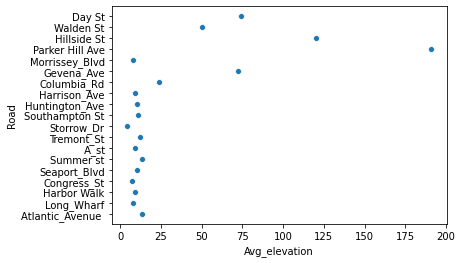

In [134]:
# Average elevation by Road

sns.scatterplot(x=Roads['Avg_elevation'],
                y=Roads['Road'])

<AxesSubplot:xlabel='Avg_elevation'>

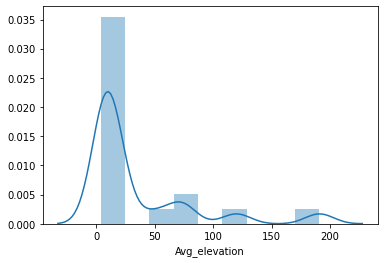

In [135]:
# Average elevation Histogram

sns.distplot(Roads['Avg_elevation'].dropna())

<AxesSubplot:xlabel='Risk_number_occurances_low_elevation_threshold_nasa', ylabel='Road'>

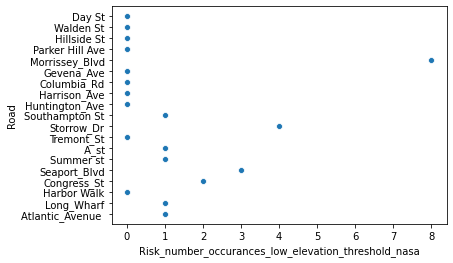

In [136]:
# Risk score from manually curated data by Road

sns.scatterplot(x=Roads['Risk_number_occurances_low_elevation_threshold_nasa'],
                y=Roads['Road'])

<AxesSubplot:xlabel='Risk_number_occurances_low_elevation_threshold_nasa'>

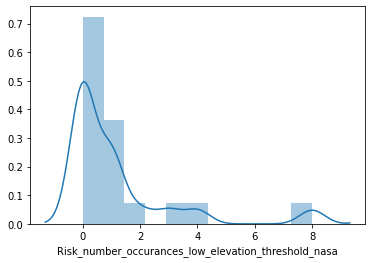

In [137]:
# Risk score from manually curated data Histogram

sns.distplot(Roads['Risk_number_occurances_low_elevation_threshold_nasa'].dropna())

In [138]:
#sns.pairplot(Roads,hue=Roads['Road'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Q_flow_in_square_feet_multiplied_by_feet_per_hour'>

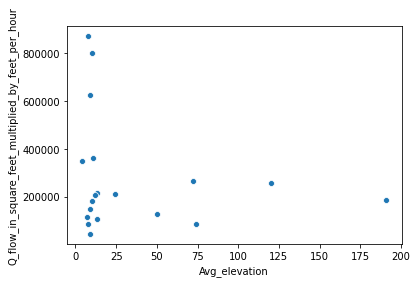

In [139]:
sns.scatterplot(x=Roads['Avg_elevation'],
                y=Roads['Q_flow_in_square_feet_multiplied_by_feet_per_hour'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Risk_number_occurances_low_elevation_threshold_nasa'>

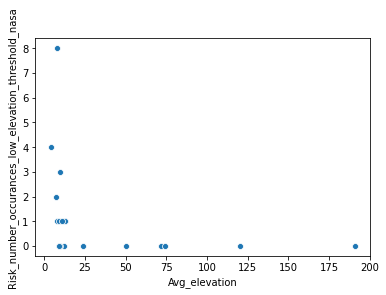

In [140]:
sns.scatterplot(x=Roads['Avg_elevation'],
                y=Roads['Risk_number_occurances_low_elevation_threshold_nasa'])

<AxesSubplot:xlabel='Distance_from_shoreline', ylabel='Road'>

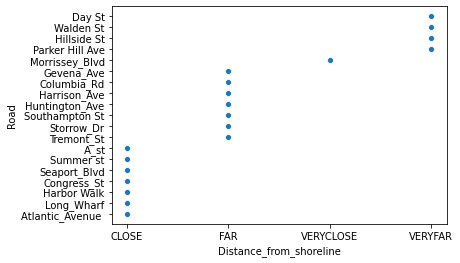

In [141]:
sns.scatterplot(x=Roads['Distance_from_shoreline'],
                y=Roads['Road'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Pounds_per_hour_in_storm'>

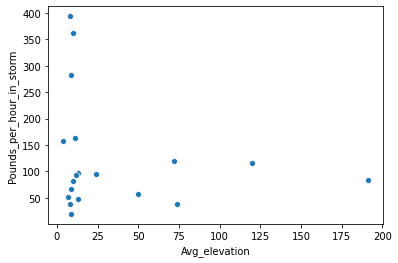

In [142]:
sns.scatterplot(x=Roads['Avg_elevation'],
                y=Roads['Pounds_per_hour_in_storm'])

<AxesSubplot:xlabel='Avg_elevation', ylabel='Q_flow_in_square_feet_multiplied_by_feet_per_hour'>

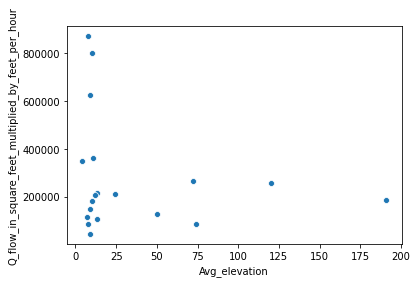

In [143]:
sns.scatterplot(x=Roads['Avg_elevation'],
                y=Roads['Q_flow_in_square_feet_multiplied_by_feet_per_hour'])

In [ ]:
#Create new dataframe

In [ ]:
['Road', 
 'State',
 'City',
 'Region',
 'Distance_from_shoreline',
 'Min_elevation_ft_google',
 'Avg_elevation',
 'Max_elevation_ft_google',
 'Max_slope_pct_1_google',
 'Max_slope_pct_2_google',
 'Avg_slope_pct_1_google',
 'Avg_slope_pct_2_google',
 'Distance_of_path_ft_google',
 'Distance_of_path_mi_google',
 'Calculated_slope_rise_run_mi',
 'Width_feet_google',
 'Distance_from_shoreline_google_ft',
 'Distance_from_shoreline_mile',
 'Area_calculated_square_feet',
 'NASA_GeoTiff_download',
 'Risk_number_occurances_low_elevation_threshold_nasa',
 'Road_type_description_manual',
 'Comments_risk',
 'Annual_sum_inches',
 'Inches_per_hour_lookup',
 'Hours_of_storm_per_year',
 'Days_of_more_than_one_inch_storm_per_year',
 'Runoff_coefficient',
 'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
 'Feet_cubed_Per_year',
 'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet',
 'Pounds_per_hour_in_storm',
 'Salt_per_mile_per_year_byCity',
 'Cost_per_mile_byCity',
 'RUSLE_output_pound_per_sqft_per_year',
 'Width_ft',
 'RUSLE_output_tons_hectare_year',
 'Length_ft',
 'RUSLE_LS_value',
 'Avg_abs_of_both_slopes',
 'RUSLE_R_value',
 'RUSLE_K_value',
 'R_value_from_address']

In [165]:
# Reduce into smaller dataframe for analysis

In [186]:
Roads

,Road,State,City,Region,Distance_from_shoreline,Min_elevation_ft_google,Avg_elevation,Max_elevation_ft_google,Max_slope_pct_1_google,Max_slope_pct_2_google,...,Cost_per_mile_byCity,RUSLE_output_pound_per_sqft_per_year,Width_ft,RUSLE_output_tons_hectare_year,Length_ft,RUSLE_LS_value,Avg_abs_of_both_slopes,RUSLE_R_value,RUSLE_K_value,R_value_from_address
0,Atlantic_Avenue,MA,Boston,Seaport,CLOSE,12.0,13.0,14.0,6.9,-8.0,...,"$345,947",5.190037,35.3,113.039001,899.0,0.26,1.300,137,0.0001,406 Atlantic Ave
1,Long_Wharf,MA,Boston,Seaport,CLOSE,5.0,8.0,9.0,4.5,-4.1,...,"$345,947",4.130154,34.5,89.954748,732.0,0.26,0.800,137,0.0001,1 Long Wharf
2,Harbor Walk,MA,Boston,Seaport,CLOSE,8.0,9.0,11.0,23.9,-20.4,...,"$345,947",1.951303,21.4,42.499373,604.0,0.24,0.895,137,0.0001,1 Harbor Walk
3,Congress_St,MA,Boston,Seaport,CLOSE,6.0,7.0,11.0,1.9,-21.6,...,"$345,947",5.285619,48.9,115.120771,716.0,0.24,0.850,137,0.0001,1 Congress Street
4,Seaport_Blvd,MA,Boston,Seaport,CLOSE,7.0,10.0,19.0,32.9,-9.7,...,"$345,947",41.141847,74.0,896.069434,3273.6,0.27,1.300,137,0.0001,1 Seaport Blvd
5,Summer st,MA,Boston,Seaport,CLOSE,11.0,13.0,16.0,5.0,-5.7,...,"$345,947",11.028574,69.9,240.202333,929.0,0.27,1.100,137,0.0001,1 Summer St
6,A_st,MA,Boston,Seaport,CLOSE,7.0,9.0,16.0,34.4,-34.6,...,"$345,947",32.228378,59.9,701.934077,3168.0,0.27,1.400,137,0.0001,1 A St
7,Tremont_St,MA,Boston,Downtown,FAR,8.0,12.0,18.0,1.7,-6.4,...,"$345,947",10.569646,63.7,230.206895,977.0,0.27,1.000,137,0.0001,1 Tremont St
8,Storrow_Dr,MA,Boston,Downtown,FAR,2.0,4.0,10.0,6.3,-5.8,...,"$345,947",17.863317,47.4,389.063039,2219.0,0.27,1.350,137,0.0001,1 Storrow Drive
9,Southampton St,MA,Boston,Downtown,FAR,8.0,11.0,12.0,5.4,-4.2,...,"$345,947",18.589156,52.8,404.871826,2073.0,0.27,0.750,137,0.0001,1 Southampton St


In [293]:
df = Roads[['Avg_elevation',
            'Road',
            'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
            'Avg_abs_of_both_slopes',
            'Min_elevation_ft_google',
            'Risk_number_occurances_low_elevation_threshold_nasa',
            'RUSLE_output_pound_per_sqft_per_year',
            'Distance_from_shoreline_google_ft',
            'Pounds_per_hour_in_storm',
           'Cost_per_mile_byCity']]

In [294]:
df = df[:19]

//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degr

//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda2/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degr

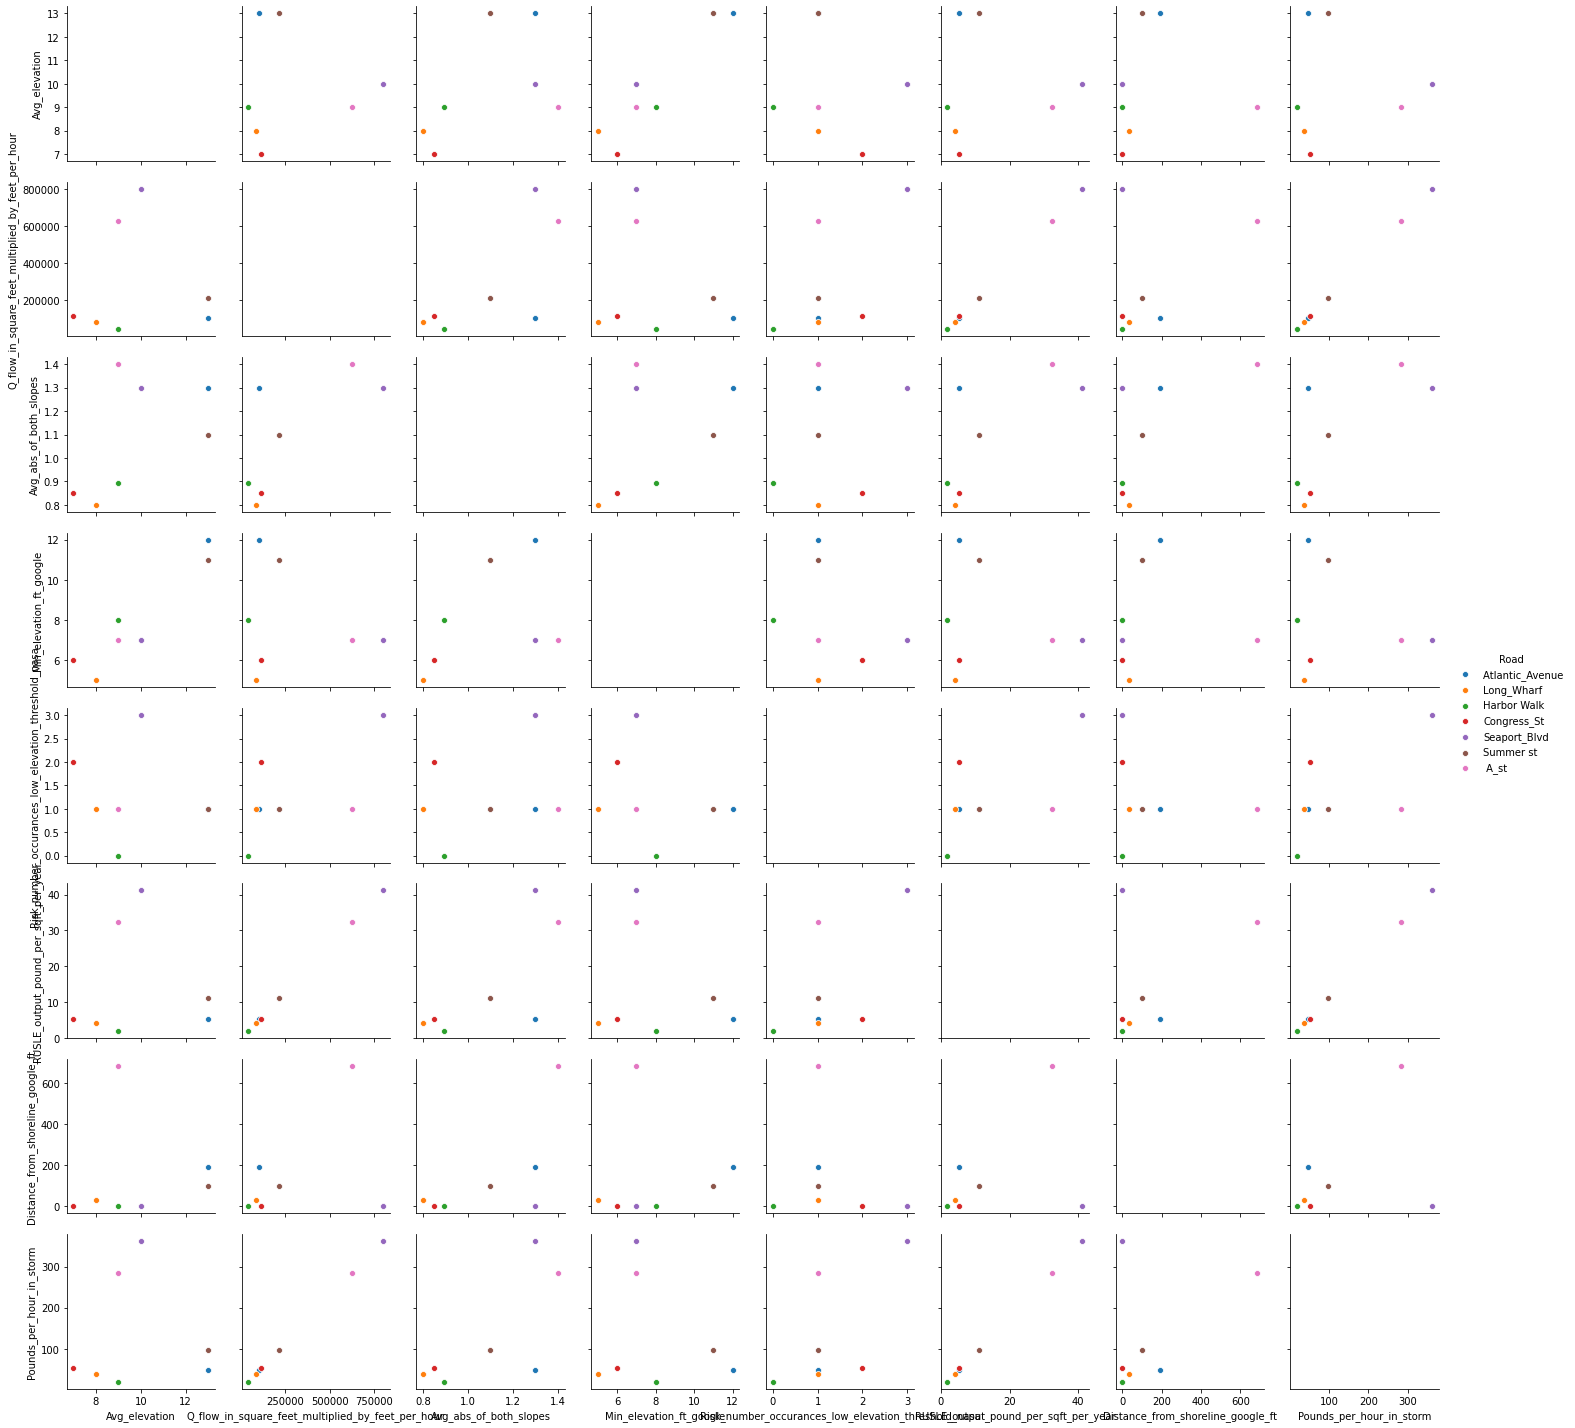

In [295]:
# Plot pair plot/matrix scatterplot
# A Multivariate technique allowing visibility of All x All parameters in a dataframe.
# In this case we expect some of them to be correlated.
# Color/hue changes based on Road Group/Binning.
# Some Warnings may be printed out with this python routine.
plot = sns.pairplot(df[:7], hue="Road")

In [190]:
### SEM modeling

In [191]:
help(semopy)

Help on package semopy:

NAME
    semopy - semopy: Structural Equation Modeling Optimization in Python

PACKAGE CONTENTS
    constraints
    efa
    effects (package)
    examples (package)
    imputer
    inspector
    means
    model
    model_base
    model_effects
    model_generalized_effects
    model_generation (package)
    model_means
    multigroup
    optimizer
    parser
    plot
    polycorr
    regularization
    report (package)
    solver
    startingvalues
    stats
    tests (package)
    unbias
    univariate_blup
    utils

DATA
    name = 'semopy'

VERSION
    2.3.9

AUTHOR
    Georgy Meshcheryakov

FILE
    //anaconda2/lib/python3.7/site-packages/semopy/__init__.py




In [192]:
#
# example data format for model as a string
#

In [193]:
desc = semopy.examples.political_democracy.get_model()
(str(desc))

'# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8'

In [194]:
desc=str('# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8\n')

In [195]:
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8



In [196]:
pip install semopy

Note: you may need to restart the kernel to use updated packages.


In [197]:
import graphviz
import semopy

In [198]:
data = semopy.examples.political_democracy.get_data()
mod = semopy.examples.political_democracy.get_model()
m = semopy.Model(mod)
m.fit(data)

SolverResult(fun=0.5083392814467853, success=True, n_it=52, x=array([2.18049353, 1.81854627, 1.25681912, 1.0581737 , 1.26518593,
       1.18574261, 1.2797166 , 1.26608392, 1.48237933, 0.57191198,
       0.8375742 , 0.62442304, 1.89274334, 1.31958852, 2.1561642 ,
       7.38529248, 0.79332879, 5.0666284 , 0.34722151, 3.14791141,
       1.35703671, 4.95436369, 0.11989392, 0.46673215, 0.17221   ,
       3.25638856, 3.43003171, 0.08157264, 2.35190966, 3.95084855,
       0.44832111]), message='Optimization terminated successfully.', name_method='SLSQP', name_obj='MLW')

In [199]:
data

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679
...,...,...,...,...,...,...,...,...,...,...,...
71,5.40,9.999998,6.666666,3.333333,3.750000,6.666666,6.666666,1.485166,4.477337,3.091042,1.987909
72,7.50,8.800000,9.999998,6.066666,7.500000,6.666666,9.999998,6.666666,5.337538,5.631212,3.491004
73,7.50,7.000000,9.999998,6.852998,7.500000,6.348340,6.666666,7.508044,6.129050,6.403574,5.001796
74,10.00,6.666666,9.999998,10.000000,10.000000,6.666666,9.999998,10.000000,5.003946,4.962845,3.976994


In [200]:
#g = semopy.semplot(m, "pd.png") #doesn't work

In [201]:
#print(g)

In [202]:
Roads.columns

Index(['Road', 'State', 'City', 'Region', 'Distance_from_shoreline',
       'Min_elevation_ft_google', 'Avg_elevation', 'Max_elevation_ft_google',
       'Max_slope_pct_1_google', 'Max_slope_pct_2_google',
       'Avg_slope_pct_1_google', 'Avg_slope_pct_2_google',
       'Distance_of_path_ft_google', 'Distance_of_path_mi_google',
       'Calculated_slope_rise_run_mi', 'Width_feet_google',
       'Distance_from_shoreline_google_ft', 'Distance_from_shoreline_mile',
       'Area_calculated_square_feet', 'NASA_GeoTiff_download',
       'Risk_number_occurances_low_elevation_threshold_nasa',
       'Road_type_description_manual', 'Comments_risk', 'Annual_sum_inches',
       'Inches_per_hour_lookup', 'Hours_of_storm_per_year',
       'Days_of_more_than_one_inch_storm_per_year', 'Runoff_coefficient',
       'Q_flow_in_square_feet_multiplied_by_feet_per_hour',
       'Feet_cubed_Per_year',
       'Erosion_Sediment_Pounds_Per_Year_from_cubic_feet',
       'Pounds_per_hour_in_storm', 'Salt_per_mi

In [ ]:
# Notes
# Our measurements
# 

# Risk,Cost ~ Rain + Topo + Erosion + Elevation + Slope + Area
# Risk ~~ Cost

# RainIntensity =~ 

# Model Risk as a latent variable

Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft
Risk Avg_abs_of_both_slopes	

Risk =~ Risk_number_occurances_low_elevation_threshold_nasa

Topo =~ Min_elevation_ft_google + Avg_elevation + 
Min_elevation_ft_google~~Avg_elevation

Rain=~

# Regression for Risk as a function of parameters
Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year

#Regression for Risk as a function of latent variables connected to parameters
Risk ~ Rain + Topo + Erosion

In [ ]:
# Old model

In [149]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa\n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation')

In [296]:
# New model

In [307]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft \n Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + RUSLE_output_pound_per_sqft_per_year + Erosion_Sediment_Pounds_Per_Year_from_cubic_feet')

In [ ]:
# Fancy model

In [221]:
desc=str('Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft\n Rain =~ Q_flow_in_square_feet_multiplied_by_feet_per_hour\n Topo =~ Avg_elevation\n Risk ~ Rain + Topo + Erosion')

In [222]:
#desc=str('# measurement model\nind60 =~ x1 + x2 + x3\ndem60 =~ y1 + y2 + y3 + y4\ndem65 =~ y5 + y6 + y7 + y8\n# regressions\ndem60 ~ ind60\ndem65 ~ ind60 + dem60\n# residual correlations\ny1 ~~ y5\ny2 ~~ y4 + y6\ny3 ~~ y7\ny4 ~~ y8\ny6 ~~ y8\n')

In [289]:
(Roads['Erosion_Sediment_Pounds_Per_Year_from_cubic_feet'][0])

834.3587097999999

In [308]:
from semopy import Model
model = Model(desc)
opt_res = model.fit(Roads)

In [309]:
model = Model(desc)
opt_res = model.fit(Roads)
estimates = model.inspect()

In [310]:
# Risk =~ Risk_number_occurances_low_elevation_threshold_nasa + Distance_from_shoreline_google_ft
# Risk ~ Q_flow_in_square_feet_multiplied_by_feet_per_hour + Avg_elevation + 

In [311]:
estimates

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Risk,~,Q_flow_in_square_feet_multiplied_by_feet_per_hour,-9.127143e-07,6.93443e-06,-0.131621,0.895284
1,Risk,~,Avg_elevation,-3.344745e-02,0.00705042,-4.74403,2.09505e-06
2,Risk,~,RUSLE_output_pound_per_sqft_per_year,7.532321e-02,0.0157405,4.78532,1.70711e-06
3,Risk,~,Erosion_Sediment_Pounds_Per_Year_from_cubic_feet,-1.153685e-04,0.000871364,-0.1324,0.894668
4,Risk_number_occurances_low_elevation_threshold...,~,Risk,1.000000e+00,-,-,-
5,Distance_from_shoreline_google_ft,~,Risk,-5.945082e+02,366.833,-1.62065,0.105093
6,Risk,~~,Risk,1.089792e+00,1.31516,0.828639,0.407309
7,Risk_number_occurances_low_elevation_threshold...,~~,Risk_number_occurances_low_elevation_threshold...,0.000000e+00,1.27143,0,1
8,Distance_from_shoreline_google_ft,~~,Distance_from_shoreline_google_ft,7.930071e+06,2.48819e+06,3.18709,0.00143714
